In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [55]:
def senLength(sentence) :
    sents = sentence.split('.')
    #avg_len = sum(len(x.split()) for x in sents) / len(sents)
    #return avg_len
    return len(sentence.split())
df['sentence_length'] = df['text'].apply(senLength)

In [56]:
df.head()

,id,text,author,sentence_length
0,id26305,"This process, however, afforded me no means of...",EAP,41
1,id17569,It never once occurred to me that the fumbling...,HPL,14
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36
3,id27763,How lovely is spring As we looked from Windsor...,MWS,34
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,27


In [79]:
df['text'][89]

'All that he said threw greatly into the shade Cornelius Agrippa, Albertus Magnus, and Paracelsus, the lords of my imagination; but by some fatality the overthrow of these men disinclined me to pursue my accustomed studies.'

In [61]:
eapLength = df.groupby('author')["sentence_length"].mean()['EAP']
hplLength = df.groupby('author')["sentence_length"].mean()['HPL']
mwsLength = df.groupby('author')["sentence_length"].mean()['MWS']

In [66]:
df.describe()

,sentence_length
count,19579.000000
mean,26.730477
std,19.048353
min,2.000000
25%,15.000000
50%,23.000000
75%,34.000000
max,861.000000


In [82]:
df['sentence_length'].argmax()

9215

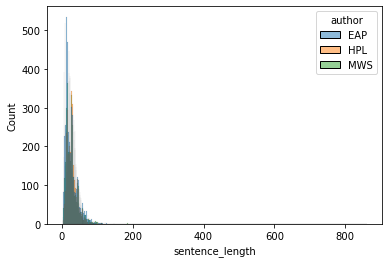

In [65]:
sns.histplot(data=df, x="sentence_length", hue="author")

In [90]:
df.describe()

,sentence_length
count,19579.000000
mean,26.730477
std,19.048353
min,2.000000
25%,15.000000
50%,23.000000
75%,34.000000
max,861.000000


In [91]:
low_df = df[df['sentence_length'] <= 300]
low_df.describe()

,sentence_length
count,19574.000000
mean,26.603862
std,17.054456
min,2.000000
25%,15.000000
50%,23.000000
75%,34.000000
max,267.000000


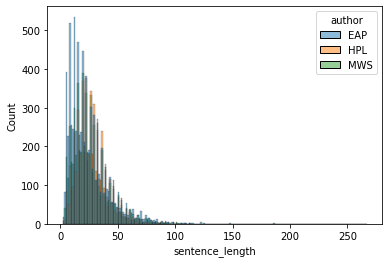

In [92]:
sns.histplot(data=low_df, x="sentence_length", hue="author")

In [108]:
eap = df[df['author'] == 'EAP']
hpl = df[df['author'] == 'HPL']
mws = df[df['author'] == 'MWS']

In [102]:
eap.head()

,id,text,author,sentence_length
0,id26305,"This process, however, afforded me no means of...",EAP,41
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP,21
7,id13515,The surcingle hung in ribands from my body.,EAP,8
8,id19322,I knew that you could not say to yourself 'ste...,EAP,88


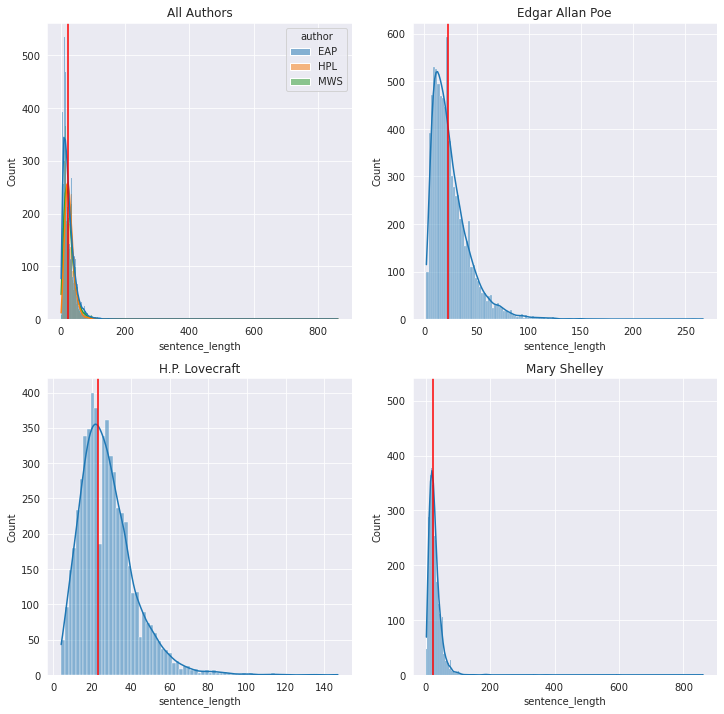

In [118]:
f = plt.figure(figsize=(12, 12))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.histplot(data=df, x="sentence_length", hue="author", kde=True)
    med_all = df['sentence_length'].median()
    plt.axvline(med_all, color='r', linestyle='-')
    plt.title('All Authors')
    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.histplot(data=eap, x="sentence_length", kde=True)
    med_eap = df['sentence_length'].median()
    plt.axvline(med_eap, color='r', linestyle='-')
    plt.title('Edgar Allan Poe')
    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.histplot(data=hpl, x="sentence_length", kde=True)
    med_hpl = df['sentence_length'].median()
    plt.axvline(med_hpl, color='r', linestyle='-')
    plt.title('H.P. Lovecraft')
    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 1])
    sns.histplot(data=mws, x="sentence_length", kde=True)
    med_mws = df['sentence_length'].median()
    plt.axvline(med_mws, color='r', linestyle='-')
    plt.title('Mary Shelley')

In [117]:
print(eapLength)
print(hplLength)
print(mwsLength)

25.44240506329114
27.799645075421473
27.417273328921244
